In [42]:
%matplotlib inline

import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

sns.set()
plt.rcParams['figure.figsize'] = (16, 9)

# Hotel Reviews Embedding

## Read and examine the data

In [43]:
data = pd.read_csv('./data.csv')

In [45]:
data.shape

(35912, 19)

In [44]:
list(data.columns.values)

['address',
 'categories',
 'city',
 'country',
 'latitude',
 'longitude',
 'name',
 'postalCode',
 'province',
 'reviews.date',
 'reviews.dateAdded',
 'reviews.doRecommend',
 'reviews.id',
 'reviews.rating',
 'reviews.text',
 'reviews.title',
 'reviews.userCity',
 'reviews.username',
 'reviews.userProvince']

In [46]:
data.head()

,address,categories,city,country,latitude,longitude,name,postalCode,province,reviews.date,reviews.dateAdded,reviews.doRecommend,reviews.id,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,NaN,NaN,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN


In [49]:
data['reviews.doRecommend'].value_counts()

Series([], Name: reviews.doRecommend, dtype: int64)

In [26]:
ratings = data['reviews.rating'].value_counts(sort=False).sort_index(ascending=False)

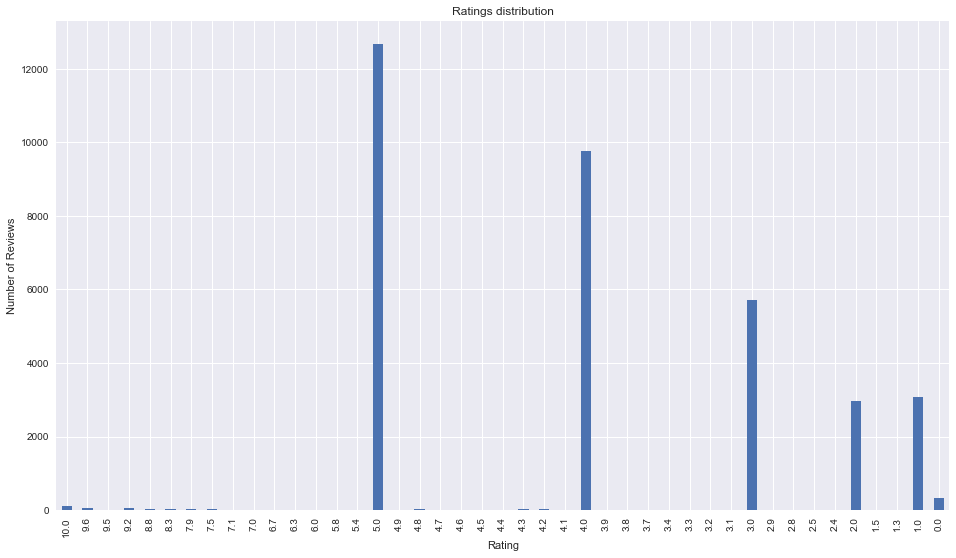

In [53]:
ratings.plot(kind='bar', title='Ratings distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

## Data cleaning
From the above inspection we note that we can use the `reviews.text` + `reviews.title` as our input data, $ x $, and the `reviews.rating` as our ground truth, $ y $.
- Remove all reviews that have a rating not in {1.0, 2.0, 3.0, 4.0, 5.0}?
- Lowercase all reviews
- Remove punctuation?
- 